## Interactuar con arduino desde un Notebook

AVISO DE CHAPUZA SUPREMA

Primero, abrimos la vía de comunicación

In [1]:
import serial
import datetime

In [2]:
ser = serial.Serial('COM4', 9600)

#Linux: ser = serial.Serial('/dev/ttyACM0', 9600)

Con la función readline() podemos leer, y con decode la dejamos más bonita

In [3]:
for i in range(100):
    print(ser.readline().decode("utf-8") )

Medida: 86.14

esperando

mode escucha

Medida: 85.00

esperando

mode escucha

Medida: 85.00

esperando

mode escucha

Medida: 85.00

esperando

mode escucha

Medida: 85.00

esperando

mode escucha

Medida: 85.00

esperando

mode escucha

Medida: 85.57

esperando

mode escucha

Medida: 85.00

esperando

mode escucha

Medida: 85.00

esperando

mode escucha

Medida: 85.00

esperando

mode escucha

Medida: 85.00

esperando

mode escucha

Medida: 84.65

esperando

mode escucha

Medida: 85.00

esperando

mode escucha

Medida: 85.00

esperando

mode escucha

Medida: 85.00

esperando

mode escucha

Medida: 85.00

esperando

mode escucha

Medida: 85.00

esperando

mode escucha

Medida: 85.00

esperando

mode escucha

Medida: 85.00

esperando

mode escucha

Medida: 85.00

esperando

mode escucha

Medida: 85.00

esperando

mode escucha

Medida: 85.00

esperando

mode escucha

Medida: 85.00

esperando

mode escucha

Medida: 85.00

esperando

mode escucha

Medida: 85.00

esperando

mode escucha



Podemos también escribir!

In [4]:
ser.write(b'50')

2

Para lo siguiente, tendremos que cortar la comunicación

In [5]:
ser.close()

Hagamos cosas de verdad

In [6]:
ser = serial.Serial('COM4', 9600) #Iniciamos comunicación

print('preparado')
for i in range(3):
    print(ser.readline().decode("utf-8") ) #Espera hasta que empiece a comunicarse
# -----------------------------------
ser.write(b'50') #Enviamos una orden
print('mensaje enviado\r\n')
for i in range(2):
    print(ser.readline().decode("utf-8") ) #Leemos un par de veces para limpiar el puerto por si acaso

for i in range(100): #Leemos hasta que pase a 'Esperando', o hasta que termine
    if ser.readline() == b'esperando\r\n':
        print('esperando\r\n')
        print(ser.readline().decode("utf-8") )
        print(ser.readline().decode("utf-8") )
        break
    print(ser.readline().decode("utf-8") )
#------------------------------------
print('pasando a segunda orden\r\n')    
ser.write(b'150')
for i in range(3):
    print(ser.readline().decode("utf-8") )
for i in range(100):
    if ser.readline() == b'esperando\r\n':
        print('esperando\r\n')
        print(ser.readline().decode("utf-8") )
        print(ser.readline().decode("utf-8") )
        break
    print(ser.readline().decode("utf-8") )
ser.close()

preparado
Medida: 85.00

esperando

mode escucha

mensaje enviado

Medida: 85.00

moviendo a 50

moviendo a 50.00 posicion: 75.41 velocidad: -0.40

moviendo a 50.00 posicion: 47.67 velocidad: -0.30

moviendo a 50.00 posicion: 37.74 velocidad: 0.10

moviendo a 50.00 posicion: 47.67 velocidad: 0.16

Medida: 51.10

esperando

mode escucha

Medida: 51.10

pasando a segunda orden

esperando

mode escucha

Medida: 51.10

moviendo a 150.00 posicion: 64.34 velocidad: 0.02

moviendo a 150.00 posicion: 77.37 velocidad: 0.42

moviendo a 150.00 posicion: 124.61 velocidad: 0.74

moviendo a 150.00 posicion: 172.23 velocidad: 0.36

moviendo a 150.00 posicion: 186.91 velocidad: -0.04

moviendo a 150.00 posicion: 174.45 velocidad: -0.44

moviendo a 150.00 posicion: 146.41 velocidad: -0.16

moviendo a 150.00 posicion: 145.52 velocidad: 0.12

moviendo a 150.00 posicion: 149.97 velocidad: 0.00

Medida: 149.97

esperando

mode escucha

Medida: 149.97



Un poco más avanzado!

In [7]:
tiempos = []
posiciones =[]
starttime = datetime.datetime.now()

ser = serial.Serial('COM4', 9600) #Iniciamos comunicación

print('preparado')
for i in range(3):
    lectura = ser.readline().decode("utf-8")
    print(lectura) #Espera hasta que empiece a comunicarse
    if lectura[:8] == 'Medida: ':
        tiempo = datetime.datetime.now()
        deltat = tiempo - starttime
        deltatvalue = deltat.seconds + deltat.microseconds/1000000
        tiempos.append(deltatvalue)
        medida = float(lectura[8:])
        posiciones.append(medida)
# -----------------------------------
ser.write(b'50') #Enviamos una orden
print('mensaje enviado\r\n')
for i in range(2):
    print(ser.readline().decode("utf-8") ) #Leemos un par de veces para limpiar el puerto por si acaso

for i in range(100): #Leemos hasta que pase a 'Esperando', o hasta que termine
    lectura = ser.readline().decode("utf-8")
    print(lectura) 
    if lectura == 'esperando\r\n':
        print(ser.readline().decode("utf-8") )
        print(ser.readline().decode("utf-8") )
        break
    if lectura[:8] == 'moviendo':
        _pos = lectura.find('posicion') + 10
        _pos2 = lectura.find(' ',_pos )
        medida = float(lectura[_pos : _pos2])
        posiciones.append(medida)
        tiempo = datetime.datetime.now()
        deltat = tiempo - starttime
        deltatvalue = deltat.seconds + deltat.microseconds/1000000
        tiempos.append(deltatvalue)
   
#------------------------------------
print('pasando a segunda orden\r\n')    
ser.write(b'150')
for i in range(4):
    lectura = ser.readline().decode("utf-8")
    print(lectura) #Espera hasta que empiece a comunicarse
    if lectura[:8] == 'Medida: ':
        tiempo = datetime.datetime.now()
        deltat = tiempo - starttime
        deltatvalue = deltat.seconds + deltat.microseconds/1000000
        tiempos.append(deltatvalue)
        medida = float(lectura[8:])
        posiciones.append(medida)
for i in range(100):
    lectura = ser.readline().decode("utf-8")
    print(lectura) 
    if lectura == 'esperando\r\n':
        print(ser.readline().decode("utf-8") )
        print(ser.readline().decode("utf-8") )
        break
    if lectura[:8] == 'moviendo':
        _pos = lectura.find('posicion') + 10
        _pos2 = lectura.find(' ',_pos )
        medida = float(lectura[_pos : _pos2])
        posiciones.append(medida)
        tiempo = datetime.datetime.now()
        deltat = tiempo - starttime
        deltatvalue = deltat.seconds + deltat.microseconds/1000000
        tiempos.append(deltatvalue)
ser.close()

preparado
Medida: 85.00

esperando

mode escucha

mensaje enviado

Medida: 85.00

moviendo a 50

moviendo a 50.00 posicion: 83.25 velocidad: -0.20

moviendo a 50.00 posicion: 74.84 velocidad: -0.40

moviendo a 50.00 posicion: 62.57 velocidad: -0.49

moviendo a 50.00 posicion: 46.10 velocidad: -0.29

moviendo a 50.00 posicion: 38.74 velocidad: -0.09

moviendo a 50.00 posicion: 38.74 velocidad: 0.11

moviendo a 50.00 posicion: 40.14 velocidad: 0.31

moviendo a 50.00 posicion: 47.85 velocidad: 0.15

mode escucha

Medida: 49.95

esperando

mode escucha

Medida: 49.95

pasando a segunda orden

esperando

mode escucha

Medida: 49.95

moviendo a 150

moviendo a 150.00 posicion: 66.86 velocidad: 0.07

moviendo a 150.00 posicion: 71.27 velocidad: 0.27

moviendo a 150.00 posicion: 85.88 velocidad: 0.47

moviendo a 150.00 posicion: 106.47 velocidad: 0.67

moviendo a 150.00 posicion: 147.22 velocidad: 0.67

moviendo a 150.00 posicion: 160.36 velocidad: 0.47

moviendo a 150.00 posicion: 176.13 velo

In [8]:
tiempos

[9.543441,
 11.497542,
 11.91103,
 12.324597,
 12.738319,
 13.147964,
 13.561093,
 13.975263,
 14.388905,
 16.145933,
 17.305456,
 17.719173,
 18.132851,
 18.546566,
 18.960526,
 19.373903,
 19.787778,
 20.201383,
 20.615092,
 21.028731,
 21.442495,
 21.855879,
 22.269789,
 22.679145,
 23.093184,
 23.506596000000002]

In [9]:
posiciones

[85.0,
 83.25,
 74.84,
 62.57,
 46.1,
 38.74,
 38.74,
 40.14,
 47.85,
 49.95,
 66.86,
 71.27,
 85.88,
 106.47,
 147.22,
 160.36,
 176.13,
 183.58,
 185.34,
 177.89,
 163.43,
 150.72,
 146.34,
 147.22,
 149.41,
 149.41]

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

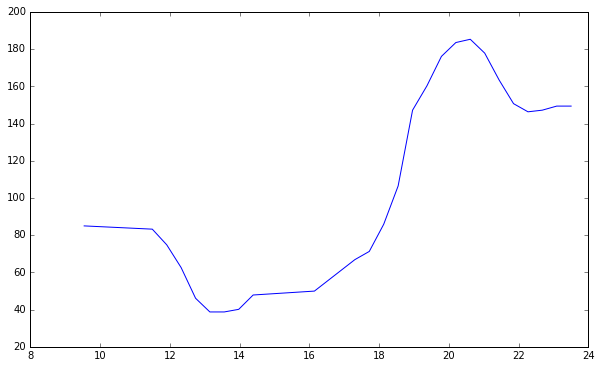

In [11]:
plt.figure(figsize=(10,6))
plt.plot(tiempos, posiciones)